<a href="https://colab.research.google.com/github/cristopherolivares/RepasoPython/blob/master/Array2dADT_1310.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
class Array2DADT:
  def __init__( self , ren , col ):
    self.__pollo = [ [0 for y in range( col ) ] for x in range( ren ) ]
  
  def clear( self , dato ):
    self.__pollo = [ [ dato for y in range( self.get_col_size() ) ] for x in range( self.get_row_size() ) ]

  def get_row_size( self ):
    return len( self.__pollo )

  def get_col_size( self ):
    return len( self.__pollo[ 0 ] )
  
  def set_item( self , ren , col , dato ):
    self.__pollo[ ren ][ col ] = dato

  def get_item( self , ren , col ):
    return self.__pollo[ ren ][ col ]

  def to_string( self ):
    cadena = ""
    for renglon in self.__pollo:
      cadena = cadena + " | "
      for dato in renglon:
        cadena = cadena + str(dato) + " | "
      cadena = cadena + "\n"
    return cadena

In [5]:
a2d = Array2DADT( 3 , 6 )
print( f"Ren: { a2d.get_row_size() }" )
print( f"Col: { a2d.get_col_size() }" )
print( a2d.to_string() )
print( "" )
a2d.clear ( "M" )
print( a2d.to_string() )

a2d.set_item ( 2 , 3 , 'P' )
print( a2d.to_string() )
print( a2d.get_item( 2 , 3 ) )

Ren: 3
Col: 6
 | 0 | 0 | 0 | 0 | 0 | 0 | 
 | 0 | 0 | 0 | 0 | 0 | 0 | 
 | 0 | 0 | 0 | 0 | 0 | 0 | 


 | M | M | M | M | M | M | 
 | M | M | M | M | M | M | 
 | M | M | M | M | M | M | 

 | M | M | M | M | M | M | 
 | M | M | M | M | M | M | 
 | M | M | M | P | M | M | 

P


In [45]:
"""
Los datos iniciales como lo son:
1.-Tamaño de la población (ren y col)
2.-La población inicial.
3.-El numero de genraciones a simular.

Estarán proporcionadas por un archivo de entrada separado por comas (CSV)

5 
5
0,0,0,0,0
0,0,1,0,0
0,1,1,1,0
0,0,0,0,0
0,0,0,0,0
10

"""
class JuegoDeLaVida:
  def __init__( self , ruta_archivo ):
    self.rens = None
    self.cols = None
    self.tablero = None
    self.generaciones = None
    self.read_game_data( ruta_archivo )

  def read_game_data( self , archivo ):
    archivo = open( archivo , 'rt' )
    lineas = archivo.readlines()
    for index in range( len( lineas ) ):
      lineas[ index ] = lineas [ index ].strip()
    # print( lineas )
    self.rens = int( lineas[ 0 ] ) 
    self.cols = int( lineas[ 1 ] ) 
    self.tablero = Array2DADT( self.rens , self.cols )
    print(f"{ self.tablero.get_row_size() } { self.tablero.get_col_size() }")
    r = 0
    c = 0
    print( lineas )
    for index in range( 2 , 2 + self.rens , 1 ):
      c = 0
      for dato in lineas[ index ].split(','):
        self.tablero.set_item( r , c , int( dato ) )
        c += 1
      r += 1
    
    self.generaciones = int( lineas[ -1 ] )
    print( "Gens: " , self.generaciones )

    print( self.tablero.to_string() )

  def get_vecinos( self , r , c):
    vecinos = []
    for ren in range( r-1 , r+2 , 1 ):
      for col in range(c-1 , c+2 , 1):
        if ren < 0 or ren >= self.tablero.get_row_size() or col < 0 or col >= self.tablero.get_col_size() or (ren==r and col==c):
          pass
        else:
          vecinos.append( ( ren , col ) )
    return vecinos

  def get_vecinos_vivos( self , r , c ):
    vecinos = self.get_vecinos( r , c )
    vivos = 0 
    for par in vecinos:
      if self.tablero.get_item( par[ 0 ] , par[ 1 ] ) == 1:
        vivos += 1 
    return vivos

  def calcular_siguiente( self ):
    nueva_gen = Array2DADT( self.rens , self.cols )
    # aplicar 4 reglas a cada célula y el resultado ponerlo a una nueva_gen
    for ren in range( self.rens ):
      for col in range( self.cols ):
        print(f"| { ren },{ col } --> { self.get_vecinos_vivos( ren , col ) }", end = " | ")
      print("")
    self.tablero = nueva_gen
    for gen in range(11):
      print(f"\n{nueva_gen.to_string()}")
      


    



In [46]:
juego = JuegoDeLaVida( "entrada2.txt" )
juego.calcular_siguiente()
"""
- Lee los datos desde un archivo (.txt o .csv)
- Tiene al menos dos archivos de entrada (entrada.txt y otros). 
  Con diferente tamaño del tablero:
  --renglones tamaño minimo de 6
  --columnas con tamaño minimo de 7
  Diferente numero de generaciones a calcular, como minimo 11
  Debe tener una población inicial de al menos 6 celulas vivas.
- Tiene un codigo de ejecución y muestra todas las generaciones en la salida ( terminal)
-Debe contener instrucciones de ejecución en caso que se haya desarrollado fuera de colab.research.google.com.
"""

7 7
['7', '7', '0,0,0,0,0,0,0', '0,0,1,0,0,0,0', '0,1,1,1,0,0,0', '0,0,0,0,0,0,0', '0,0,0,0,1,0,0', '0,0,0,1,0,1,0', '0,0,0,0,0,0,0', '10']
Gens:  10
 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 
 | 0 | 0 | 1 | 0 | 0 | 0 | 0 | 
 | 0 | 1 | 1 | 1 | 0 | 0 | 0 | 
 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 
 | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 
 | 0 | 0 | 0 | 1 | 0 | 1 | 0 | 
 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 

| 0,0 --> 0 | | 0,1 --> 1 | | 0,2 --> 1 | | 0,3 --> 1 | | 0,4 --> 0 | | 0,5 --> 0 | | 0,6 --> 0 | 
| 1,0 --> 1 | | 1,1 --> 3 | | 1,2 --> 3 | | 1,3 --> 3 | | 1,4 --> 1 | | 1,5 --> 0 | | 1,6 --> 0 | 
| 2,0 --> 1 | | 2,1 --> 2 | | 2,2 --> 3 | | 2,3 --> 2 | | 2,4 --> 1 | | 2,5 --> 0 | | 2,6 --> 0 | 
| 3,0 --> 1 | | 3,1 --> 2 | | 3,2 --> 3 | | 3,3 --> 3 | | 3,4 --> 2 | | 3,5 --> 1 | | 3,6 --> 0 | 
| 4,0 --> 0 | | 4,1 --> 0 | | 4,2 --> 1 | | 4,3 --> 2 | | 4,4 --> 2 | | 4,5 --> 2 | | 4,6 --> 1 | 
| 5,0 --> 0 | | 5,1 --> 0 | | 5,2 --> 1 | | 5,3 --> 1 | | 5,4 --> 3 | | 5,5 --> 1 | | 5,6 --> 1 | 
| 6,0 --> 0 | | 6,1 --> 0 | | 6

'\n- Lee los datos desde un archivo (.txt o .csv)\n- Tiene al menos dos archivos de entrada (entrada.txt y otros). \n  Con diferente tamaño del tablero:\n  --renglones tamaño minimo de 6\n  --columnas con tamaño minimo de 7\n  Diferente numero de generaciones a calcular, como minimo 11\n  Debe tener una población inicial de al menos 6 celulas vivas.\n- Tiene un codigo de ejecución y muestra todas las generaciones en la salida ( terminal)\n-Debe contener instrucciones de ejecución en caso que se haya desarrollado fuera de colab.research.google.com.\n'

In [3]:
!cat entrada.txt

5 
5
0,0,0,0,0
0,0,1,0,0
0,1,1,1,0
0,0,0,0,0
0,0,0,0,0
10

In [2]:
!cat entrada2.txt

7
7
0,0,0,0,0,0,0
0,0,1,0,0,0,0
0,1,1,1,0,0,0
0,0,0,0,0,0,0
0,0,0,0,1,0,0
0,0,0,1,0,1,0
0,0,0,0,0,0,0
10

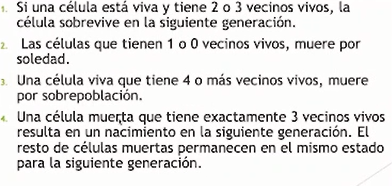